## Assignment-2
#### Name: Kritika Jindal
#### Reg. No.: 20BCE1913

#### Loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Perform descriptive statistics on the dataset.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
df['pclass'] = df['pclass'].astype('category') 
df['survived'] = df['survived'].astype('category') 
df['adult_male'] = df['adult_male'].astype('category') 
df['alone'] = df['alone'].astype('category') 

#### Handling Missing Values

In [5]:
df.shape

(891, 15)

In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

There are 3 attributes with missing values.

In [7]:
# dropping "deck".
df=df.drop(['deck'],axis=1)

In [8]:
# impoting missing value using mean and mode.
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [9]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### Perform descriptive statistics on the dataset.

In [10]:
#descriptive statistics using descirbe function.
df.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [11]:
#checking the mean
df.mean(numeric_only=True)

age      29.699118
sibsp     0.523008
parch     0.381594
fare     32.204208
dtype: float64

In [12]:
#checking the median
df.median(numeric_only=True)

age      29.699118
sibsp     0.000000
parch     0.000000
fare     14.454200
dtype: float64

In [13]:
#checking the mode
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,29.699118,0,0,8.05,S,Third,man,True,Southampton,no,True


In [14]:
#checking the max value
df.max(numeric_only=True)

age       80.0000
sibsp      8.0000
parch      6.0000
fare     512.3292
dtype: float64

In [15]:
#checking the min value
df.min(numeric_only=True)

age      0.42
sibsp    0.00
parch    0.00
fare     0.00
dtype: float64

In [16]:
#checking the range
df_range = df.max(numeric_only=True)-df.min(numeric_only=True)
df_range

age       79.5800
sibsp      8.0000
parch      6.0000
fare     512.3292
dtype: float64

In [17]:
#checking the variance
df.var(numeric_only=True)

age       169.052400
sibsp       1.216043
parch       0.649728
fare     2469.436846
dtype: float64

In [18]:
#checking the standard deviation
df.std(numeric_only=True)

age      13.002015
sibsp     1.102743
parch     0.806057
fare     49.693429
dtype: float64

In [19]:
#checking the skewness
df.skew(numeric_only=True)

age      0.434488
sibsp    3.695352
parch    2.749117
fare     4.787317
dtype: float64

In [20]:
#checking the kurtosis
df.kurt(numeric_only=True)

age       0.966279
sibsp    17.880420
parch     9.778125
fare     33.398141
dtype: float64

#### Univariate Analysis Visualization

<Axes: >

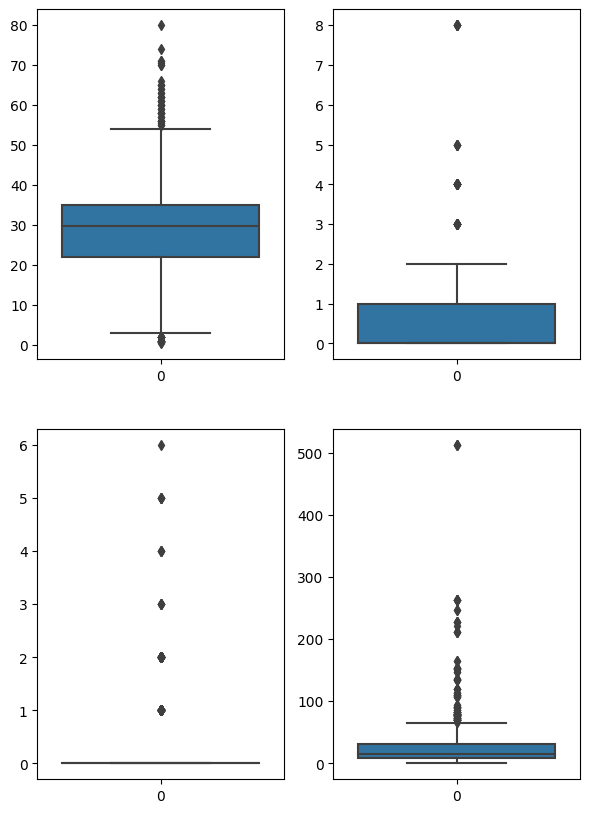

In [21]:
plt.figure(figsize = (7,10))
plt.subplot(2,2,1)
sns.boxplot(df['age'])
plt.subplot(2,2,2)
sns.boxplot(df['sibsp'])
plt.subplot(2,2,3)
sns.boxplot(df['parch'])
plt.subplot(2,2,4)
sns.boxplot(df['fare'])

<Axes: xlabel='embarked', ylabel='count'>

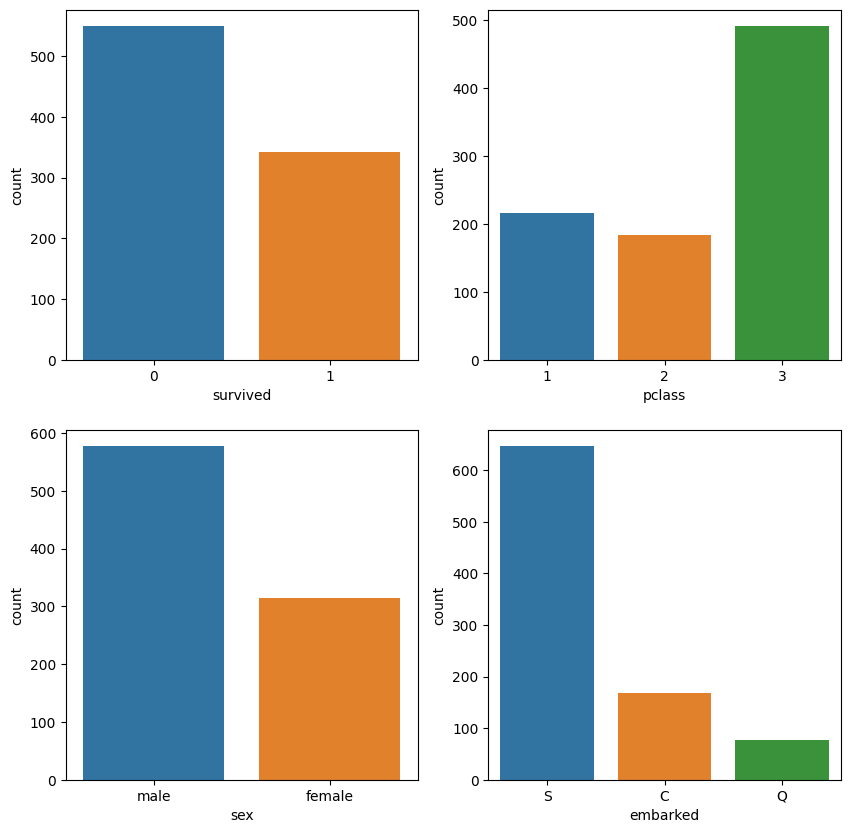

In [22]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(x=df['survived'])
plt.subplot(2,2,2)
sns.countplot(x=df['pclass'])
plt.subplot(2,2,3)
sns.countplot(x=df['sex'])
plt.subplot(2,2,4)
sns.countplot(x=df['embarked'])

<Axes: xlabel='embark_town', ylabel='count'>

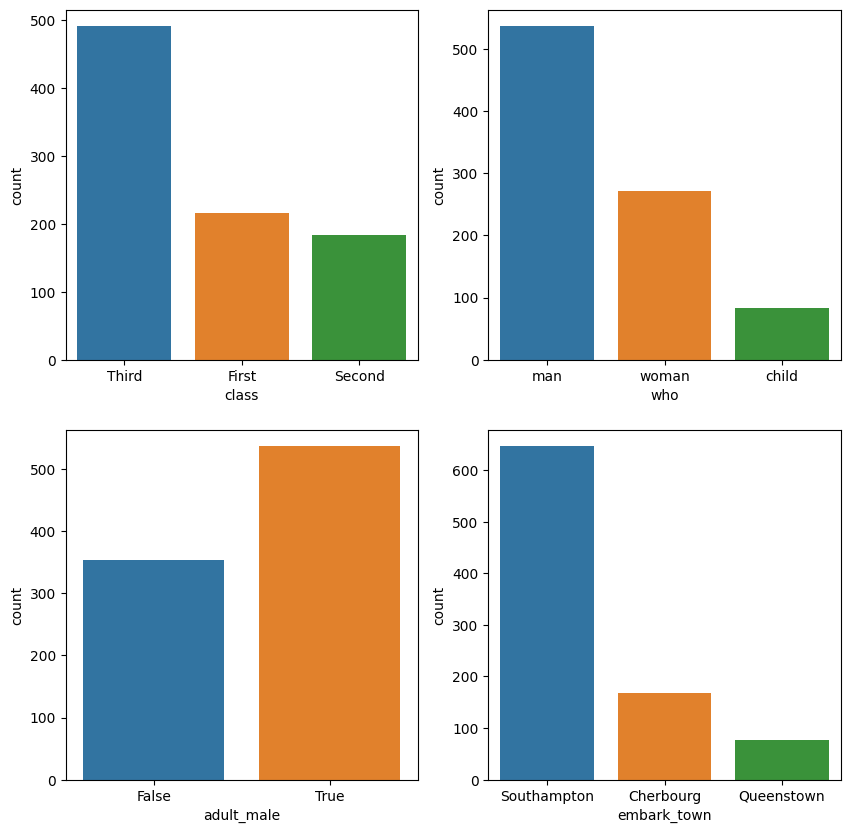

In [23]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(x=df['class'])
plt.subplot(2,2,2)
sns.countplot(x=df['who'])
plt.subplot(2,2,3)
sns.countplot(x=df['adult_male'])
plt.subplot(2,2,4)
sns.countplot(x=df['embark_town'])

<Axes: xlabel='alone', ylabel='count'>

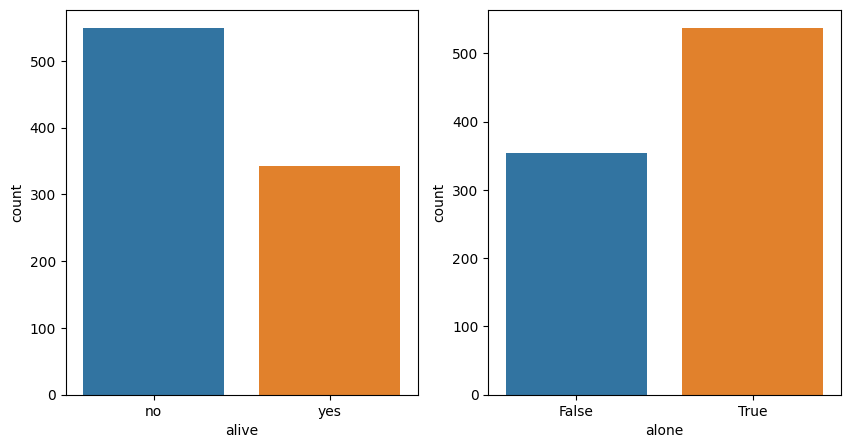

In [24]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x=df['alive'])
plt.subplot(1,2,2)
sns.countplot(x=df['alone'])

#### Bi-Variate Analysis Visualization

<Axes: xlabel='survived', ylabel='age'>

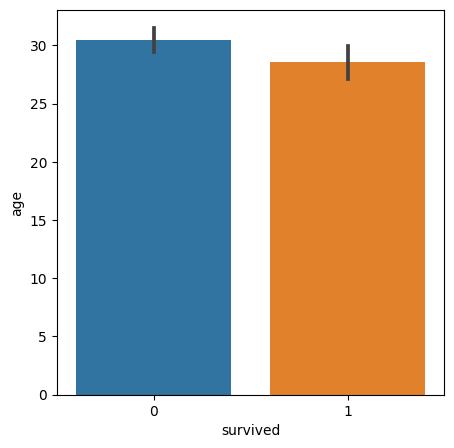

In [25]:
plt.figure(figsize = (5,5))
sns.barplot(x=df['survived'], y=df['age'])

<Axes: xlabel='sex', ylabel='count'>

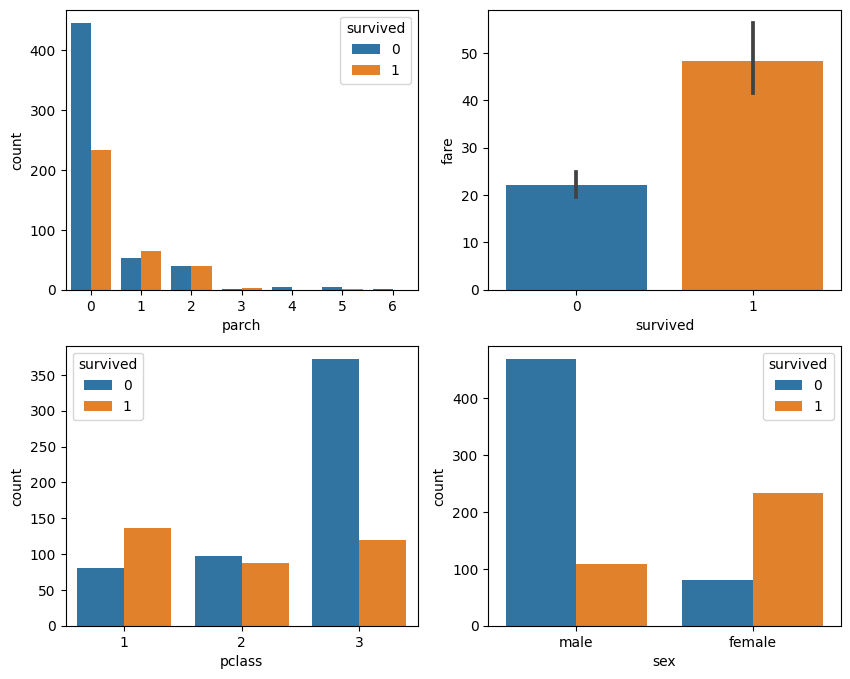

In [26]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.countplot(x=df['parch'],hue=df['survived'])
plt.subplot(2,2,2)
sns.barplot(x=df['survived'], y=df['fare'])
plt.subplot(2,2,3)
sns.countplot(x=df['pclass'],hue=df['survived'])
plt.subplot(2,2,4)
sns.countplot(x=df['sex'],hue=df['survived'])


<Axes: xlabel='adult_male', ylabel='count'>

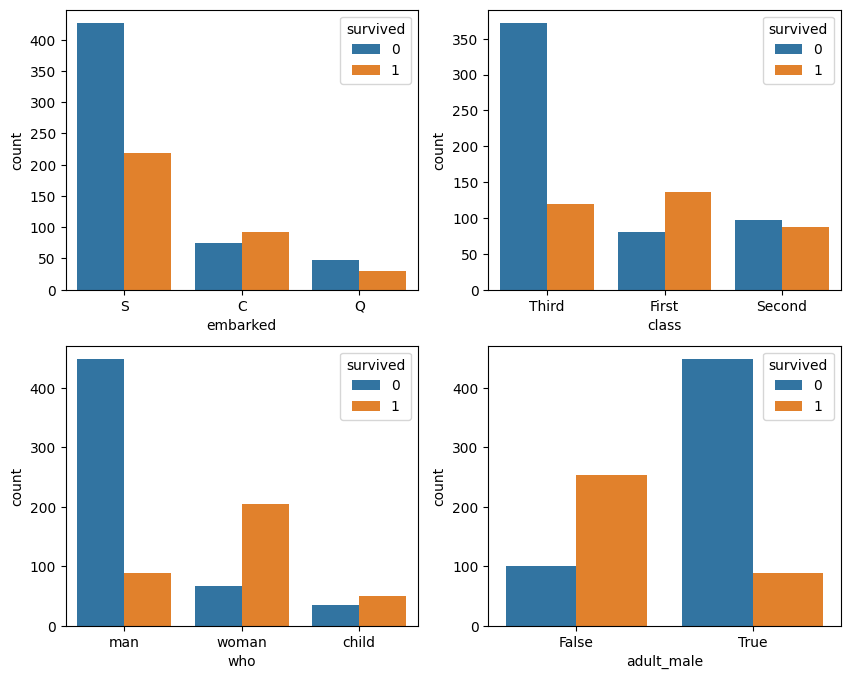

In [27]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.countplot(x=df['embarked'],hue=df['survived'])
plt.subplot(2,2,2)
sns.countplot(x=df['class'],hue=df['survived'])
plt.subplot(2,2,3)
sns.countplot(x=df['who'],hue=df['survived'])
plt.subplot(2,2,4)
sns.countplot(x=df['adult_male'],hue=df['survived'])

<Axes: xlabel='alone', ylabel='count'>

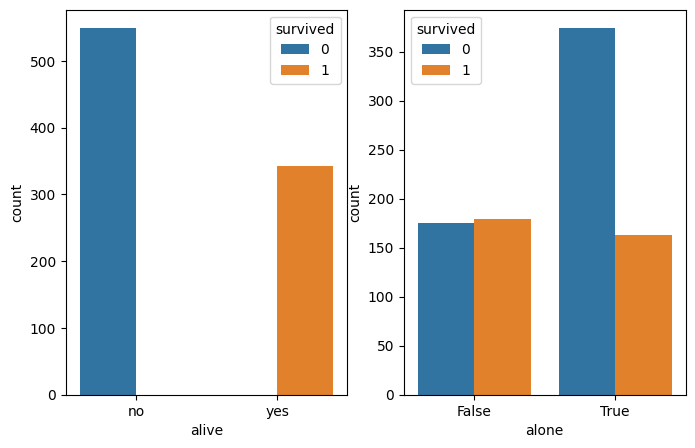

In [28]:
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.countplot(x=df['alive'],hue=df['survived'])
plt.subplot(1,2,2)
sns.countplot(x=df['alone'],hue=df['survived'])

#### Multi-Variate Analysis Visualization

<Axes: xlabel='sibsp', ylabel='parch'>

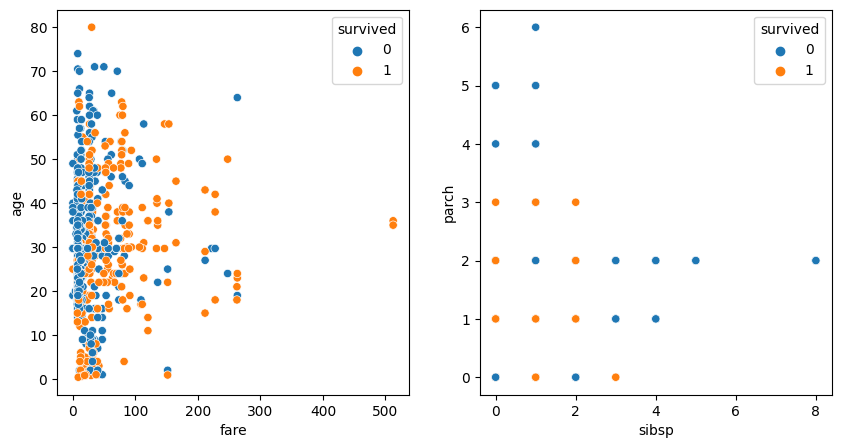

In [29]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['fare'], y=df['age'], hue=df['survived'])
plt.subplot(1,2,2)
sns.scatterplot(x=df['sibsp'], y=df['parch'], hue=df['survived'])

#### HEATMAP


<Axes: >

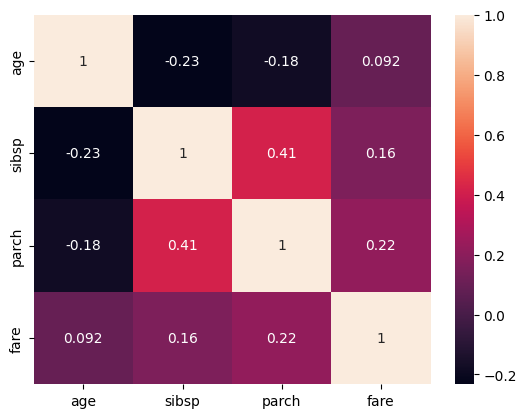

In [30]:
sns.heatmap(df.corr(), annot=True)

####  Find the outliers and replace the outliers

In [31]:
quantile=df.quantile(q=[0.75,0.25],numeric_only=True)
quantile

,age,sibsp,parch,fare
0.75,35.0,1.0,0.0,31.0000
0.25,22.0,0.0,0.0,7.9104


In [32]:
quantile.iloc[0]

age      35.0
sibsp     1.0
parch     0.0
fare     31.0
Name: 0.75, dtype: float64

In [33]:
IQR=quantile.iloc[0]-quantile.iloc[1]

In [34]:
upper_extreme=quantile.iloc[0]+(1.5*IQR)
upper_extreme

age      54.5000
sibsp     2.5000
parch     0.0000
fare     65.6344
dtype: float64

In [35]:
lower_extreme=quantile. iloc[1]-(1.5* IQR)
lower_extreme

age       2.500
sibsp    -1.500
parch     0.000
fare    -26.724
dtype: float64

In [36]:
df.shape

(891, 14)

In [37]:
df = df[df['age'] <= upper_extreme[0]]
df = df[df['age'] >= lower_extreme[0]]
df = df[df['sibsp'] <= upper_extreme[1]]
df = df[df['sibsp'] >= lower_extreme[1]]
df = df[df['parch'] <= upper_extreme[2]]
df = df[df['parch'] >= lower_extreme[2]]
df = df[df['fare'] <= upper_extreme[3]]
df = df[df['fare'] >= lower_extreme[3]]
df.shape

(577, 14)

####  Check for Categorical columns and perform encoding

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [39]:
lst = ['sex','embarked','class','who','adult_male','embark_town','alive','alone']
le = LabelEncoder()
df[lst] = df[lst].apply(le.fit_transform)

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,0,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,2,0,1
5,0,3,1,29.699118,0,0,8.4583,1,2,1,1,1,0,1


#### Split the data into dependent and independent variables

In [41]:
x=df.iloc[:,1:14]
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,0,0
2,3,0,26.000000,0,0,7.9250,2,2,2,0,2,1,1
3,1,0,35.000000,1,0,53.1000,2,0,2,0,2,1,0
4,3,1,35.000000,0,0,8.0500,2,2,1,1,2,0,1
5,3,1,29.699118,0,0,8.4583,1,2,1,1,1,0,1


In [42]:
y=df.iloc[:,0:1]
y.head()

,survived
0,0
2,1
3,1
4,0
5,0


#### Scale the independent variables

In [43]:
x = MinMaxScaler().fit_transform(x)

####  Split the data into training and testing

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [50]:
print("Shape of training samples: \nX train: ",X_train.shape," \nY train: ",y_train.shape)

# X_train.shape 
# y_train.shape

Shanpe of training samples: 
 X train:  (386, 13)  
 Y train:  (386, 1)


In [53]:
print("Shape of testing samples: \nX test: ",X_test.shape," \nY test: ",y_test.shape)

Shape of testing samples: 
X test:  (191, 13)  
Y test:  (191, 1)
